In [1]:
%matplotlib inline
# Dependencies and Setup
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
new_city=pd.read_csv(city_data_to_load)
new_ride=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
my_combo=pd.merge(new_ride,new_city, how="left", on =["city","city"])
#combo_tab=pd.merge(new_ride,new_city, on = "city")

# Display the data table for preview
#my_combo.shape
#my_combo.head()
#my_combo.duplicates[]
# new_ride.head()
#new_city.head()

In [2]:
# Obtain the x and y coordinates for each of the three city types

# urb_df=my_combo.groupby('type')
#group by type
urb_df=my_combo[my_combo.type=='Urban']
rur_df=my_combo[my_combo.type=='Rural']
sub_df=my_combo[my_combo.type=='Suburban']

In [3]:
#subgrp by city in the type
u_city_df=urb_df.groupby('city')
r_city_df=rur_df.groupby('city')
s_city_df=sub_df.groupby('city')

In [4]:
#get the driver cnt this should be the radius of the buble or SIZE
s1=u_city_df['driver_count']
s2=r_city_df['driver_count']
s3=s_city_df['driver_count']

In [5]:
#x axis is the number of unique cities in a type
# uniq_df = purch_data_df[['SN', 'Gender', 'Age']]
y1_df=u_city_df['fare']
y2_df=r_city_df['fare']
y3_df=s_city_df['fare']


In [6]:
#avg fare
u_avg= urb_df.groupby('city').fare.mean()
r_avg= rur_df.groupby('city').fare.mean()
s_avg= sub_df.groupby('city').fare.mean()

In [7]:
#ride per city
totals_city_u= urb_df.groupby('city').city.count()
totals_city_r= rur_df.groupby('city').city.count()
totals_city_s= sub_df.groupby('city').city.count()


In [8]:
#rides by the drivers by city
remove_dups = my_combo.drop_duplicates(subset=['city'], keep='first')
remove_dups.shape

#unique city 
u_urb_df=remove_dups[my_combo.type=='Urban']
u_rur_df=remove_dups[my_combo.type=='Rural']
u_sub_df=remove_dups[my_combo.type=='Suburban']


C:\Users\lumk4\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\lumk4\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\lumk4\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## Bubble Plot of Ride Sharing Data

In [9]:
#set X axis, Y axis, and Size
x1=totals_city_u
x2=totals_city_r
x3=totals_city_s

y1=u_avg
y2=r_avg
y3=s_avg

s1=(u_urb_df.groupby('city').driver_count.sum())*5
s2=(u_rur_df.groupby('city').driver_count.sum())*5
s3=(u_sub_df.groupby('city').driver_count.sum())*5



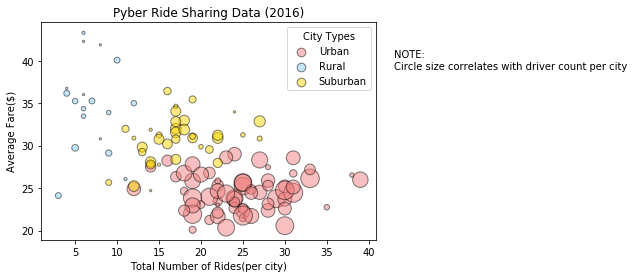

<Figure size 432x288 with 0 Axes>

In [10]:
#plotting
plt.scatter(x1,y1,s1,c='lightcoral',alpha=0.5,edgecolor='black',label='Urban')
plt.scatter(x2,y2,s2,c='lightskyblue',alpha=0.5,edgecolor='black',label='Rural')
plt.scatter(x3,y3,s3,c='Gold',alpha=0.5,edgecolor='black',label='Suburban')

plt.xlabel('Total Number of Rides(per city)')
plt.ylabel('Average Fare($)')
plt.title('Pyber Ride Sharing Data (2016)')

#bld the legend
l=plt.legend(title= 'City Types', loc='upper right',markerscale=1)
l.legendHandles[0]._sizes =[75]
l.legendHandles[1]._sizes =[75]
l.legendHandles[2]._sizes =[75]

#inc text label regarding circle sizes
plt.text(43,39, "NOTE: \nCircle size correlates with driver count per city")#fontsize=50, transform=plt.gcf().transFigure)

#show and save
plt.show()
plt.savefig('Pyber homework5 bubble.png', dpi=100, bbox_inches='tight')


## Total Fares by City Type

In [11]:
# Calculate Type Percents total urban then div by the total fares
#calc the total fares
tot_fare=my_combo.fare.sum()
#calc urban fares
urb_fare= urb_df.fare.sum()
#calc percent
urb_fare_per=(urb_fare/tot_fare)*100
# print (tot_fare)
# print(urb_fare)
# print(urb_fare_per)
#cal the Rural and Suburban
rur_fare= rur_df.fare.sum()
sub_fare= sub_df.fare.sum()
#percentage
rur_fare_per=(rur_fare/tot_fare)*100
sub_fare_per=(sub_fare/tot_fare)*100

(-1.1159533755147852,
 1.1605309952462382,
 -1.1016368644655254,
 1.1343741537769025)

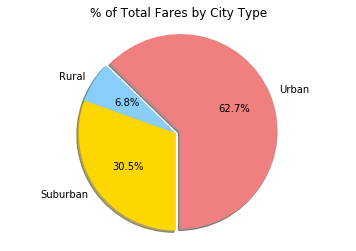

In [12]:
# Build Pie Chart
plt.title("% of Total Fares by City Type")
c_type=['Urban','Rural','Suburban']
c_perc=[urb_fare_per,rur_fare_per,sub_fare_per]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.05, 0.0, 0)        

plt.pie(c_perc, explode=explode, labels=c_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("equal")

In [13]:
# Show Figure and save
plt.show()
plt.savefig('Pyber homework5 pie_fare.png', dpi=100, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

In [14]:
# Calculate Ride Percents
#calc the total rides
tot_ride=my_combo.city.count()
#calc urban rides
urb_ride= urb_df.ride_id.count()
#calc percent
urb_ride_per=(urb_ride/tot_ride)*100
# print(tot_ride)
# print(urb_ride)
# print(urb_ride_per)
#calc for Rural and Suburban
rur_ride= rur_df.ride_id.count()
sub_ride= sub_df.ride_id.count()
#percentage
rur_ride_per=(rur_ride/tot_ride)*100
sub_ride_per=(sub_ride/tot_ride)*100

(-1.1565690630836243,
 1.114214049977038,
 -1.1309003765943257,
 1.1153813182926497)

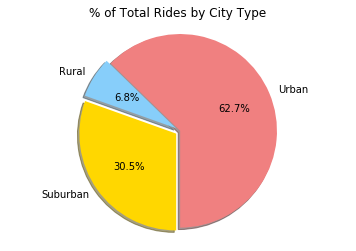

In [15]:
# Build Pie Chart
plt.title("% of Total Rides by City Type")
p_type=['Urban','Rural','Suburban']
p_perc=[urb_fare_per,rur_fare_per,sub_fare_per]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.0, 0.05, 0.05)        
plt.pie(p_perc, explode=explode, labels=p_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("equal")

In [16]:
# Show Figure and save
plt.show()
plt.savefig('Pyber homework5 pie_ride.png', dpi=100, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

In [17]:
# Calculate Driver Percents

tot_cnt_newcity= new_city.groupby(['type'])['driver_count'].sum()/new_city['driver_count'].sum()*100

#tot_cnt_df.head(120)
#print(tot_cnt_df)


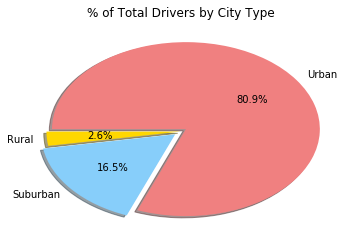

<Figure size 432x288 with 0 Axes>

In [18]:
#build plot
plt.title("% of Total Drivers by City Type")

plt.pie(tot_cnt_newcity, labels=['Rural','Suburban','Urban'],colors = ["gold","lightskyblue","lightcoral"],
        explode = (0.0, 0.05, 0.05),autopct="%1.1f%%", shadow=True, startangle=180)
#show and save
plt.show()
plt.savefig('Pyber homework5 pie_driver.png', dpi=100, bbox_inches='tight')